In [1]:
top_directory = '/Users/iaincarmichael/Dropbox/Research/law/law-net/'

from __future__ import division

import os
import sys
import time
from math import *
import copy
import cPickle as pickle

# data
import numpy as np
import pandas as pd

# viz
import matplotlib.pyplot as plt


# graph
import igraph as ig


# NLP
from nltk.corpus import stopwords


# our code
sys.path.append(top_directory + 'code/')
from load_data import load_and_clean_graph, case_info
from pipeline.download_data import download_bulk_resource
from pipeline.make_clean_data import *
from viz import print_describe


sys.path.append(top_directory + 'vertex_metrics_experiment/code/')
from make_snapshots import *
from make_edge_df import *
from attachment_model_inference import *
from compute_ranking_metrics import *
from pipeline_helper_functions import *
from make_case_text_files import *
from bag_of_words import *
from similarity_matrix import *

# directory set up
data_dir = top_directory + 'data/'
experiment_data_dir = data_dir + 'vertex_metrics_experiment/'

court_name = 'scotus'

# jupyter notebook settings
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
G = load_and_clean_graph(data_dir, court_name)

In [19]:
active_years = range(1900, 2015 + 1)

# get NLP similarity

In [58]:
# load precomputed matrix
similarity_matrix, CLid_to_index = load_similarity_matrix(experiment_data_dir)

# compare present edges vs absent edges NLP similarity

In [23]:
present_ing = []
present_ed = []
for e in G.es:
    
    present_ing.append(G.vs[e.source]['name'])
    present_ed.append(G.vs[e.target]['name'])

In [22]:
absent_edges = sample_absent_edges(G, num_samples=len(G.es), active_years=active_years)

absent_ing = []
absent_ed = []
for e in absent_edges:
    
    absent_ing.append(G.vs[e[0]]['name'])
    absent_ed.append(G.vs[e[1]]['name'])

In [61]:
sims_present = get_similarities(similarity_matrix, zip(present_ing, present_ed), CLid_to_index)

sims_absent = get_similarities(similarity_matrix, zip(absent_ing, absent_ed), CLid_to_index)

sims_present = np.array(sims_present)
sims_absent = np.array(sims_absent)

present
nobs: 249689
mean: 0.661
median: 0.674
min: 0.015
max: 1.000
std: 0.126
unique values 2922

absent
nobs: 249768
mean: 0.425
median: 0.471
min: 0.000
max: 0.919
std: 0.200
unique values 5701


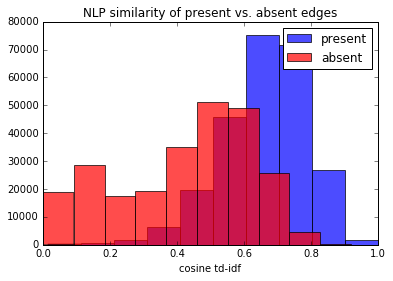

In [62]:
plt.hist(sims_present[~np.isnan(sims_present)],
         color='blue',
         label='present',
         alpha=.7)
plt.hist(sims_absent[~np.isnan(sims_absent)],
         color='red',
         label='absent',
         alpha=.7)

plt.xlabel('cosine td-idf')
plt.title('NLP similarity of present vs. absent edges')

plt.legend(loc='upper right')

print 'present'
print_describe( sims_present[~np.isnan(sims_present)])

print ''
print 'absent'
print_describe( sims_absent[~np.isnan(sims_absent)])